# *supertrab - trabecular histomorphometry of bone scaffold*
From a segmented micro-CT image to quantification of trabecular bone histomorphometry

Created on:  04.04.2025 <br />
Last update: 04.04.2025 <br />

- By: [Gianluca Iori](https://github.com/gianthk)
- Code license: MIT
- Narrative license: CC-BY-NC-SA

---
# Computational workflow
## Configuration and imports

In [1]:
import os
import sys

In [2]:
# terminus
sys.path.append('/usr/terminus/data-xrm-01/stamplab/users/giiori/code/pyfabric')
sys.path.append('/usr/terminus/data-xrm-01/stamplab/users/giiori/code/ORMIR_XCT')
sys.path.append('/usr/terminus/data-xrm-01/stamplab/users/giiori/code/recon_utils')

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_multiotsu
from skimage import morphology
from skimage.measure import label, regionprops, regionprops_table
import SimpleITK as sitk

from imaging_utils import periosteummask, remove_unconnected
# from resources.myshow import myshow, myshow3d
from recon_utils import read_tiff_stack, plot_midplanes, bbox
# import pyfabric
# from resources.pyfabric_image_utils import dist_table, markers_coors, resample_img, vectors2rotation3Dmatrix, align_with_XYplane, align_with_vectors, resample, affine_trans

astropy module not found
olefile module not found


In [5]:
from ormir_xct.util.hildebrand_thickness import calc_structure_thickness_statistics

In [9]:
matplotlib.rcParams['figure.dpi'] = 300

font = {'weight' : 'normal',
        'size'   : 6}

plt.rc('font', **font)

## Data location

In [6]:
data_folder = '/usr/terminus/data-xrm-01/stamplab/processed/Zeiss730/2025/02/01_Scaffold-nocell_2025-02-07_111220/masks/'
datasets = ['scaffold1_clean', 'scaffold2_clean', 'scaffold3_clean']
output_folder = '/usr/terminus/data-xrm-01/stamplab/processed/Zeiss730/2025/02/01_Scaffold-nocell_2025-02-07_111220/meshes/' 

#### Load input data
Scan Settings:

* Zeiss Versa 730
* Flat panel detector
* 01_scaffold_nocell_batch (3 scans)
* 9.4 um pixelsize

Read the input data and define an array of the voxelsize

In [90]:
input_file = os.path.join(data_folder, datasets[2], 'slice_001.tiff')
# data_3D = read_tiff_stack(input_file)
# data_3D = np.rot90(read_tiff_stack(input_file), k=1, axes=(1, 2))
data_3D = np.transpose(read_tiff_stack(input_file), axes=(1, 0, 2))

vs = np.ones(3)*9.4e-3 # [mm]

Inspect the dataset

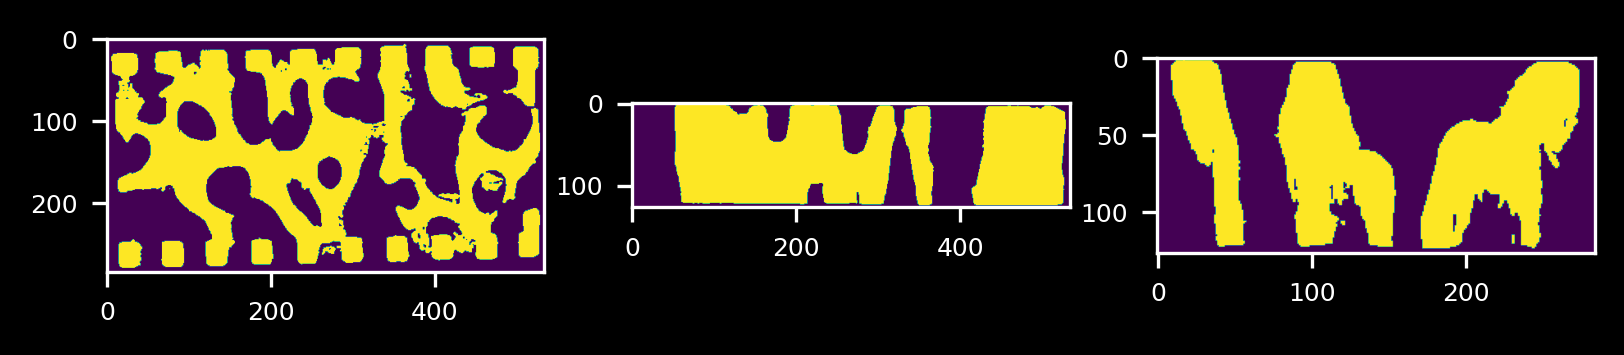

In [91]:
plot_midplanes(data_3D)

## Pre-processing
### Bounding Box of the scaffold

In [92]:
bboxx = bbox(data_3D>0.1)
print('bbox: ', bboxx)

bbox:  ([4, 2, 0], [279, 527, 126])


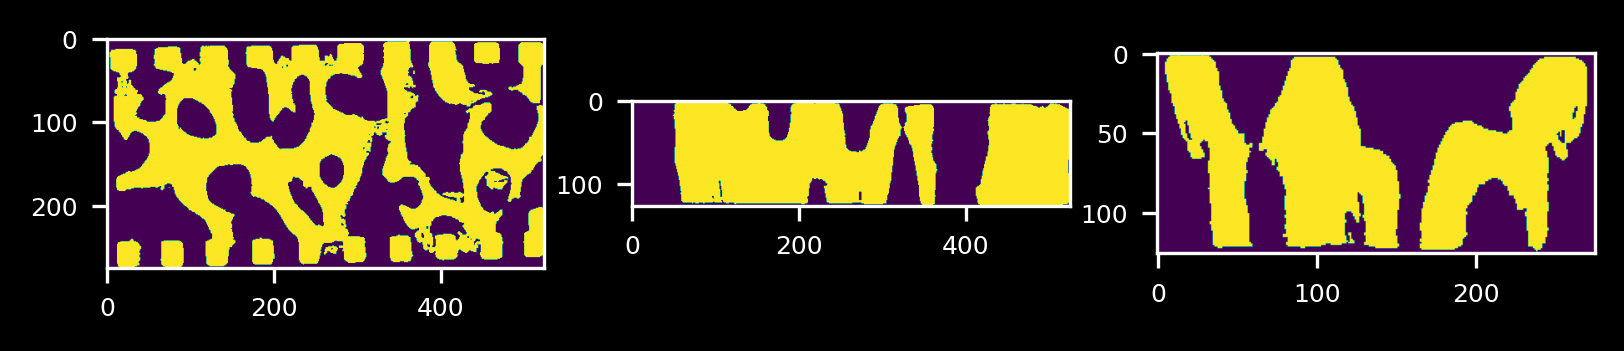

In [93]:
BW2 = data_3D[bboxx[0][2]:bboxx[1][2], bboxx[0][0]:bboxx[1][0], bboxx[0][1]:bboxx[1][1]].astype('bool')
plot_midplanes(BW2)

### Crop along x
Remove pillars around the scaffold

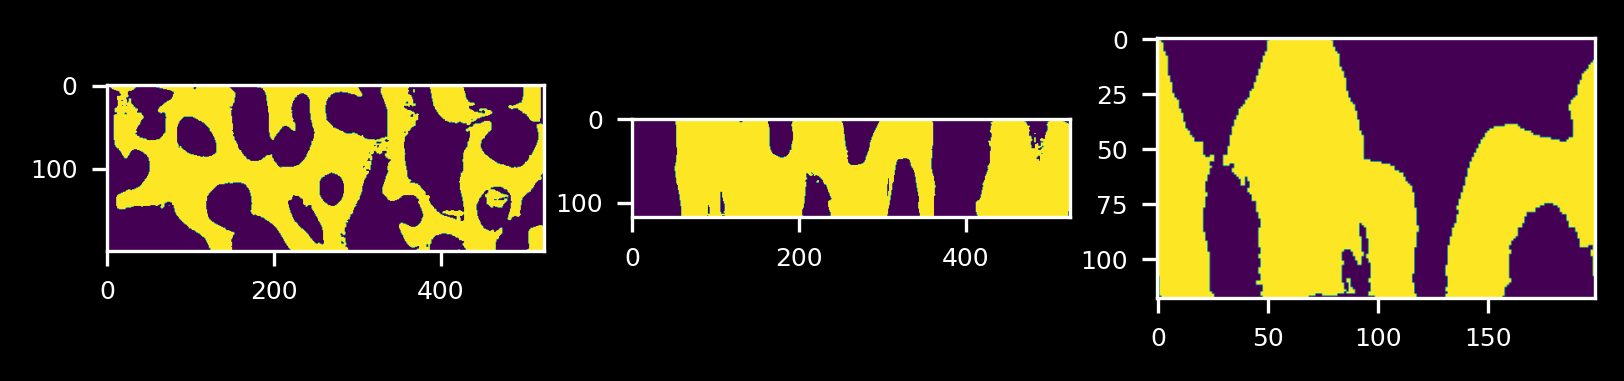

In [97]:
BW3 = BW2[4:-4, 34:-42, :]
plot_midplanes(BW3)

### Remove unconnected regions

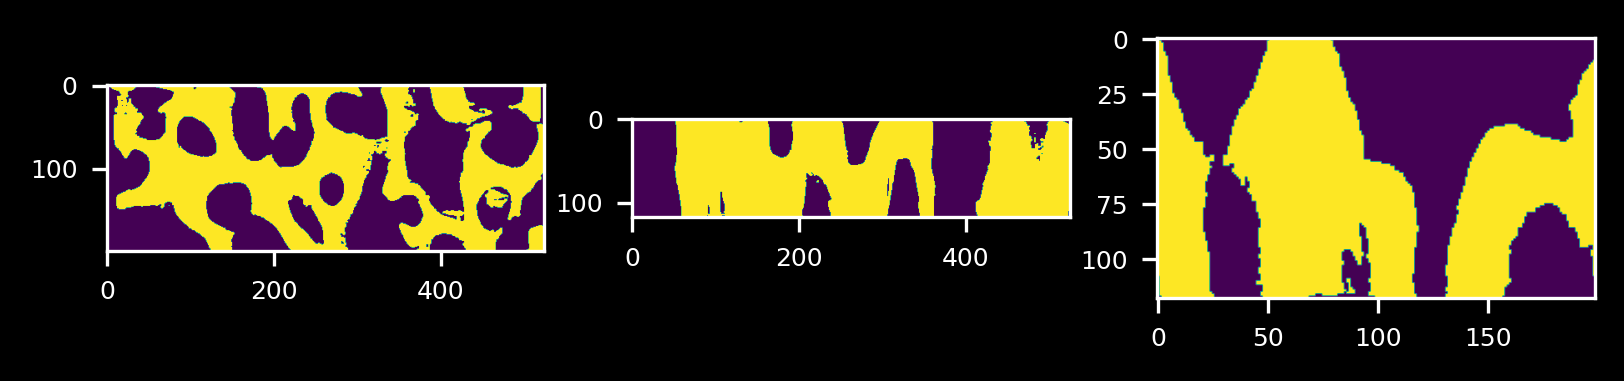

In [98]:
BW4 = remove_unconnected(BW3)
plot_midplanes(BW4)

## Histomorphometry calculations

|   | BVTV | Tb.Th [mm] |
| - | ---- | ---------- |
| Scaffold 1 | 0.382 | 0.323 +/- 0.118 |
| Scaffold 2 | 0.361 | 0.298 +/- 0.118 |
| Scaffold 3 | 0.439 | 0.332 +/- 0.110 |


### BV/TV

In [99]:
bvtv = np.sum(BW4)/np.prod(BW4.shape)
print('BV/TV: ', bvtv)

BV/TV:  0.4394330814686832


### Trabecular thickness

In [100]:
thickness_stats = calc_structure_thickness_statistics(BW4, vs, 0)
print(
    f"Thickness: {thickness_stats[0]:0.3f} +/- {thickness_stats[1]:0.3f}"
)

Thickness: 0.332 +/- 0.110


---
# Dependencies

In [99]:
import watermark

In [ ]:
%load_ext watermark

%watermark
%watermark --iversions

---
# Acknowledgements
- This notebook was developed within [Building the Jupyter Community in MSK Imaging Research](https://github.com/JCMSK/2022_JCW), a Jupyter Community Workshop sponsored by [NUMFocus](https://numfocus.org/)